### Day36.YOLO 細節理解-網絡架構      
用實際的影像，嘗試自己搭建一個 1乘1和 3乘 3的模型    
看通過 1乘1和 3乘3 卷積層後會有甚麼變化?     
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化     

In [1]:
#宣告
import cv2
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.models import Sequential 
from keras.layers.core import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D


Using TensorFlow backend.


'wget' 不是內部或外部命令、可執行的程式或批次檔。


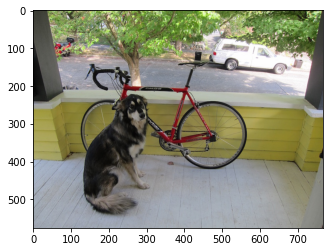

In [2]:
##讀入照片
# 下載圖片範例，如果已經下載過就可以註解掉
!wget https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true -O dog.jpg
image=cv2.imread('dog.jpg')
#ax.imshow(image)

def show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # plt.imshow 預設圖片是 rgb 的
    plt.show()
show(image)

In [33]:
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸为 (batch, rows, cols, channels)

model_1 = Sequential(name = "sequential_1")
model_1.add(Conv2D(3, (1,1),          #搭建一個 3 個 1*1 的 filters
         padding="same",
         data_format='channels_last',
         activation='relu',
                        
         input_shape=image.shape))

model_2 = Sequential(name = "sequential_2")
model_2.add(Conv2D(3, (1,1),          #搭建一個 3 個 1*1 的 filters
         padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))
model_2.add(Conv2D(4, (3,3),          #搭建一個 4 個 3*3 的 filters
         padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))

model_3 = Sequential(name = "sequential_3")
model_3.add(Conv2D(3, (1,1),          #搭建一個 3 個 1*1 的 filters
         padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))
model_3.add(Conv2D(4, (3,3),          #搭建一個 4 個 3*3 的 filters
         padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))
model_3.add(Conv2D(3, (1,1),          #搭建一個 3 個 1*1 的 filters
         padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))
model_3.add(Conv2D(4, (3,3),          #搭建一個 4 個 3*3 的 filters
         padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))

print(model_1.summary())
print("===================\n")
print(model_2.summary())
print("===================\n")
print(model_3.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 576, 768, 3)       12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 576, 768, 3)       12        
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 576, 768, 4)       112       
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________
None

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv

In [34]:
# keras 在讀取檔案實是以 batch 的方式一次讀取多張，
#但我們這裡只需要判讀一張，
#所以透過 expand_dims() 函式來多擴張一個維度
image_batch=np.expand_dims(image,axis=0)
print(image_batch.shape)

(1, 576, 768, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(576, 768, 3)


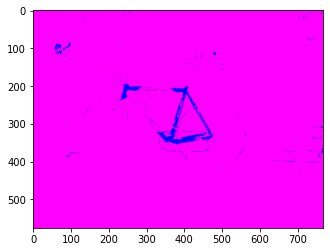

In [35]:
#model.predict() 函式，得到回傳便是 feature map
image_1_conv = model_1.predict(image_batch)
img_1 = np.squeeze(image_1_conv, axis = 0)
print(img_1.shape)
plt.imshow(img_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(576, 768, 4)


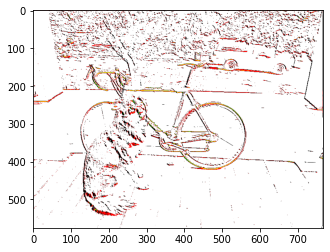

In [36]:
#model.predict() 函式，得到回傳便是 feature map
image_2_conv = model_2.predict(image_batch)
img_2 = np.squeeze(image_2_conv, axis = 0)
print(img_2.shape)
plt.imshow(img_2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(576, 768, 4)


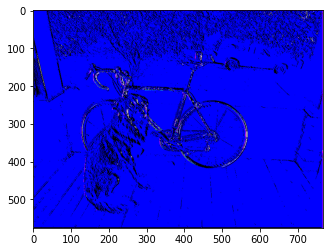

In [37]:
#model.predict() 函式，得到回傳便是 feature map
image_3_conv = model_3.predict(image_batch)
img_3 = np.squeeze(image_3_conv, axis = 0)
print(img_3.shape)
plt.imshow(img_3)

#### 由於權重都是亂數值，所以每次跑出來的結果不同
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化